#  préambule : quantities

In [1]:
import quantities as pq
import numpy as np

t1 = 1000 * pq.ms
t2 = 1.5 * pq.min
print(t1+t2)

t1 = np.arange(10) * pq.ms
t2 = pq.Quantity(np.ones(10), units='s')
t3 = t1 + t2
print(t3)
t4 = t3.rescale('min')
print(t4)


91000.0 ms
[1000. 1001. 1002. 1003. 1004. 1005. 1006. 1007. 1008. 1009.] ms
[0.01666667 0.01668333 0.0167     0.01671667 0.01673333 0.01675
 0.01676667 0.01678333 0.0168     0.01681667] min


# neo = neuro electrophysiological objects

![](img/neo_logo.png)

Neo est un modules python qui permet:
  * de représenetr des object pour l'electrophy (AnalogSignal, Event, SpikeTrain...)
  * de lire plein deformat de:
    * Blackrock
    * Micromed
    * Brainvision
    * Neuralynx
    * Plexon
    * Spike2
    * Elan
    * tdt
    * ...


# Object

![](img/neo_base_schematic.png)


# Multi segment

![](img/neo_multi_segment_diagram.png)

# Lire du micromed

In [2]:
import neo

reader = neo.MicromedIO(filename='./data/File_micromed_1.TRC')


In [3]:
print(reader)

MicromedIO: ./data/File_micromed_1.TRC
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 64)]
signal_channels: [FP1, FP2, AF7, AF3 ... Trig , VEOG , HEOG , EMG]
spike_channels: []
event_channels: [Trigger, Note, Event A, Event B]



# 1 seul block qui contient 1 seul segment

In [4]:
block = reader.read_block()
print('nb segment', len(block.segments))

nb segment 1


# qui contient plusieurs des object "data"

In [5]:
seg = block.segments[0]
print('nb AnalogSignal', len(seg.analogsignals))
print('nb SpikeTrain', len(seg.spiketrains))
print('nb Event', len(seg.events))

nb AnalogSignal 1
nb SpikeTrain 0
nb Event 2


In [23]:
seg.rec_datetime

datetime.datetime(2007, 11, 15, 15, 4, 7)

In [24]:
seg.annotations

{'firstname': b'Tp_metrologie',
 'surname': b'Tp_metrologie',
 'header_version': 4}

# AnalogSignal

contient:

  * datas
  * des unité
  * sampling_rate
  * t_start
  * vecteur temps: times
  * name/description
  * annotations

In [25]:
anasig = seg.analogsignals[0]
print(anasig)

[[-177.2461   -141.99219  -116.40625  ... -120.703125   17.382812
   107.22656 ]
 [-224.70703  -119.82422  -150.97656  ... -107.12891    11.328125
   114.84375 ]
 [-266.01562  -137.30469  -200.48828  ... -113.57422    18.261719
    37.5     ]
 ...
 [ -35.253906   22.851562   41.601562 ...   85.05859   100.19531
  -189.84375 ]
 [ -99.21875    81.25       57.03125  ...   88.47656   150.6836
  -155.3711  ]
 [-152.92969    24.316406   88.28125  ...   87.20703   152.73438
  -136.6211  ]] uV


In [26]:
print(anasig.shape)

(1000, 64)


In [27]:
print(anasig.units)

1.0 uV


In [28]:
print(anasig.name)

Signals


In [29]:
print(anasig.annotations)

{'stream_id': '0'}


In [30]:
print(anasig.array_annotations)

{'channel_names': array(['FP1', 'FP2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
       'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1',
       'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz',
       'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2',
       'CP4', 'CP6', 'TP8', 'T5', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4',
       'P6', 'T6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2',
       'Trig', 'VEOG', 'HEOG', 'EMG'], dtype='<U4'), 'channel_ids': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63'], dtype='<U2'), 'ground': array(['G2', 'G2', 'G2', 'G2', 'G2', 'G2'

# revenir vers du numpy array avec la bonne unité

In [9]:
np_sig = anasig.rescale('mV').magnitude
print(type(anasig))
print(type(np_sig))
print(np_sig)

<class 'neo.core.analogsignal.AnalogSignal'>
<class 'numpy.ndarray'>
[[-0.17724611 -0.1419922  -0.11640625 ... -0.12070313  0.01738281
   0.10722657]
 [-0.22470704 -0.11982422 -0.15097657 ... -0.10712891  0.01132813
   0.11484376]
 [-0.26601565 -0.1373047  -0.20048828 ... -0.11357422  0.01826172
   0.0375    ]
 ...
 [-0.03525391  0.02285156  0.04160156 ...  0.0850586   0.10019532
  -0.18984376]
 [-0.09921876  0.08125     0.05703125 ...  0.08847657  0.1506836
  -0.1553711 ]
 [-0.1529297   0.02431641  0.08828125 ...  0.08720703  0.15273438
  -0.1366211 ]]


# lire les "triggers" = Event ou Epoch

In [10]:
for ev in seg.events:
    print()
    print('name', ev.name)
    print('times', ev.times)
    print('labels', ev.labels)

for ep in seg.epochs:
    print()
    print('name', ep.name)
    print('times', ep.times)
    print('durations', ep.durations)
    print('labels', ep.labels)



name Trigger
times [0.203125   1.12890625 2.02734375 3.82421875] s
labels ['1' '1' '1' '1']

name Note
times [] s
labels []

name Event A
times [] s
durations [] s
labels []

name Event B
times [] s
durations [] s
labels []


# plot

remarquer dans l'example comme c'est facile de choisir l'unité de temps.

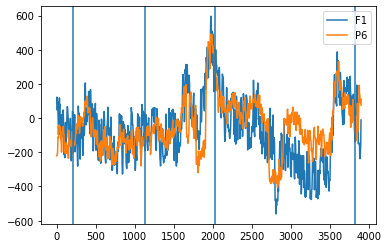

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for chan in [10, 50]:
    chan_name = anasig.array_annotations['channel_names'][chan]
    ax.plot(anasig.times.rescale('ms'), anasig[:, chan].magnitude, label=chan_name)

for t in seg.events[0].times:
    ax.axvline(t.rescale('ms'))

ax.legend()